### Part 1: Exploratory Data Analysis  
Aggregate login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime as dt
%matplotlib inline

In [ ]:
#import data
logins = pd.read_json('logins.json')
logins.head()

In [ ]:
print(logins.info())
print(logins.describe())

In [ ]:
login_15 = logins.resample('15T', on='login_time').count()
login_15.columns = ['login_count']
login_15.head()

In [ ]:
#login_15.reset_index(inplace=True)
#login_15['login_date'] = login_15.login_time.dt.date
#login_15[login_15.login_count == 0].login_count.groupby(login_15.login_date).count().sort_values(ascending=False).head()

daily_logins = login_15.login_count.groupby(login_15.login_date).sum()
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(daily_logins.index, height=daily_logins.values)
plt.title('Daily Logins')
plt.ylabel('# Logins')
plt.xlabel('Date')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(login_15.index, login_15.login_count)
plt.xlabel('login time (15 min)')
plt.ylabel('login count')
print(login_15.sort_values('login_count', ascending=False).head(10))

In [ ]:
login_15.reset_index(inplace=True)
login_15['login_just_time'] = login_15.login_time.dt.time
login_15['login_day'] = login_15.login_time.dt.day
login_15['login_month'] = login_15.login_time.dt.month
login_15.head()

In [ ]:
login_april = login_15[login_15.login_month == 4]
login_april.reset_index(inplace=True, drop=True)

fig1, ax1 = plt.subplots(figsize=(15,5))
for i in login_april.login_day.unique():
    plt.plot(login_april[login_april.login_day==i].login_just_time, login_april[login_april.login_day==i].login_count)

plt.xlabel('login time (15 min)')
plt.ylabel('login count')
plt.xlim(0)

In [ ]:
login_jan = login_15[login_15.login_month == 1]
login_jan.reset_index(inplace=True, drop=True)
login_feb = login_15[login_15.login_month == 2]
login_feb.reset_index(inplace=True, drop=True)
login_mar = login_15[login_15.login_month == 3]
login_mar.reset_index(inplace=True, drop=True)

fig1, ax1 = plt.subplots(figsize=(15,5))
for i in login_jan.login_day.unique():
    plt.plot(login_jan[login_jan.login_day==i].login_just_time, login_jan[login_jan.login_day==i].login_count, alpha=.5)
for i in login_april.login_day.unique():
    plt.plot(login_april[login_april.login_day==i].login_just_time, login_april[login_april.login_day==i].login_count, alpha=.5)
for i in login_feb.login_day.unique():
    plt.plot(login_feb[login_feb.login_day==i].login_just_time, login_feb[login_feb.login_day==i].login_count, alpha=.5)
for i in login_mar.login_day.unique():
    plt.plot(login_mar[login_mar.login_day==i].login_just_time, login_mar[login_mar.login_day==i].login_count, alpha=.5)

plt.title('Login Counts Jan 1st - Apr 13th')
plt.xlabel('login time (15 min)')
plt.ylabel('login count')
plt.xlim(0)

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15,5))
for i in login_jan.login_day.unique():
    plt.plot(login_jan[login_jan.login_day==i].login_just_time, login_jan[login_jan.login_day==i].login_count, alpha=.5)
plt.title('Jan')
plt.ylabel('login count')
fig2, ax2 = plt.subplots(figsize=(15,5))
for i in login_feb.login_day.unique():
    plt.plot(login_feb[login_feb.login_day==i].login_just_time, login_feb[login_feb.login_day==i].login_count, alpha=.5)
plt.title('Feb')
plt.ylabel('login count')
fig3, ax3 = plt.subplots(figsize=(15,5))
for i in login_mar.login_day.unique():
    plt.plot(login_mar[login_mar.login_day==i].login_just_time, login_mar[login_mar.login_day==i].login_count, alpha=.5)
plt.title('Mar')
plt.ylabel('login count')
fig4, ax4 = plt.subplots(figsize=(15,5))
for i in login_april.login_day.unique():
    plt.plot(login_april[login_april.login_day==i].login_just_time, login_april[login_april.login_day==i].login_count)
plt.title('Apr')
plt.xlabel('login time (15 min)')
plt.ylabel('login count')
plt.xlim(0)

In [ ]:
login_3h = logins.resample('3H', on='login_time').count()
login_3h.columns = ['login_count']
login_3h.reset_index(inplace=True)
login_3h['login_just_time'] = login_3h.login_time.dt.time
login_3h['time_string'] = login_3h.login_just_time.astype(str)
login_3h['login_day'] = login_3h.login_time.dt.day
login_3h['login_month'] = login_3h.login_time.dt.month
login_3h.head()
#login_3h.info()

In [ ]:
early_logins = login_3h[login_3h.time_string == '03:00:00']
jan_early_logins = early_logins[early_logins.login_month==1]
jan_early_logins.head()
sns.barplot(x='login_day', y='login_count', data=jan_early_logins)
plt.title('January Login Counts 3am-6am')
plt.ylabel('login counts')
plt.xlabel('day of month')
#weekends are where those early morning login spikes are coming form

### Part 2 ‐ Experiment and metrics design  
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.  
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.  
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

 **The key meausure for this experiment would be toll usage. Due to the circadian rhythms of the city affecting   activity during the week, we'd want to track which toll is being used (into gotham or into metro), the day, and time  of day.**  
  
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:  
 a. how you will implement the experiment  
 **Track toll-bridge usage, and we'd expect to see an increase in toll-bridge use.**  
 b. what statistical test(s) you will conduct to verify the significance of the
 observation  
 **If we have previous data, and we track this over several months, then we can do some bootstrap tests to see if there is a significant increase in toll usage in three areas:**  
 **1. During the Day for into Metropolis**  
 **2. During the night for into Gotham**  
 **3. weekends in general for both toll directions**  
 c. how you would interpret the results and provide recommendations to the city
 operations team along with any caveats.  
 **If we are not seeing an increase in any area, then the system isn't working at all. If we are seing an increase during the week for either toll then we know at least drivers are no longer discouraged from being available when the cities are most busy. If there is no uptick on the weekends this may mean they are just busy enough in their own city that they don't need to cross, which may be fine. If we see an increase in all areas, then the plan seems to be working. Since we are only tracking toll usage, this could mean personal cars are using the tolls more frequently, we'd either need a way to only look at taxis, or cross-reference with the toll reimbursements.**

### Part 3 - Predictive Modeling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?  
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.  
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

In [2]:
import json 
data = json.load(open('ultimate_data_challenge.json'))
riders = pd.DataFrame(data)
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [3]:
riders.last_trip_date = pd.to_datetime(riders.last_trip_date, format="%Y-%m-%d")
riders.signup_date = pd.to_datetime(riders.signup_date, format="%Y-%m-%d")
riders.signup_date = riders.signup_date.dt.day
riders.info()
#probably want to set avg_rating missing values to either 0 or the mean. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null int64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


In [4]:
lastday = riders.last_trip_date.max() - pd.Timedelta('30 days')
print(lastday)
print(lastday + pd.Timedelta('30 days'))
#we can infer from this that the data was pulled on 7/1/2014 and any rider who has used the service since 6/1/2014 is retained

2014-06-01 00:00:00
2014-07-01 00:00:00


In [5]:
riders['retained'] = (riders.last_trip_date > lastday)

riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,6,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,27,11.8,14,False,82.4,False


In [8]:
print('retention rate:', len(riders[riders.retained == True])/len(riders.retained)*100, '%')

retention rate: 36.620000000000005 %


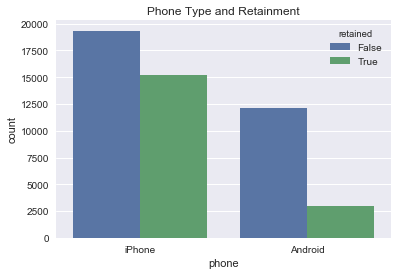

In [71]:
#riders.phone.fillna(0, inplace=True)
#riders.phone.replace(0,'No Phone', inplace=True)
sns.countplot(x="phone", hue="retained", data=riders)
plt.title('Phone Type and Retainment')

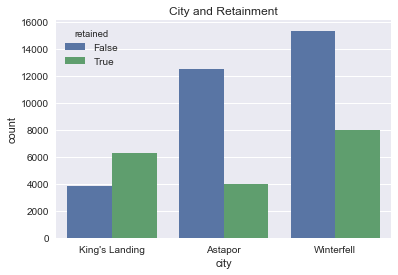

In [72]:
sns.countplot(x="city", hue="retained", data=riders)
plt.title('City and Retainment')

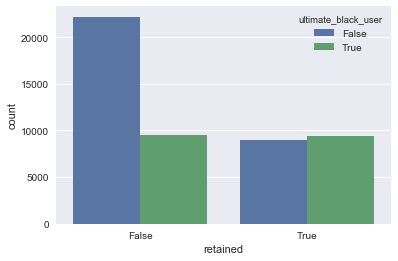

In [11]:
sns.countplot(x="retained", hue="ultimate_black_user", data=riders)

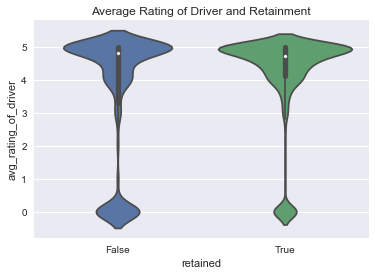

In [76]:
riders.avg_rating_of_driver.fillna(0, inplace=True)
riders.avg_rating_by_driver.fillna(0, inplace=True)
sns.violinplot(x='retained', y='avg_rating_of_driver', data=riders)
plt.title('Average Rating of Driver and Retainment')


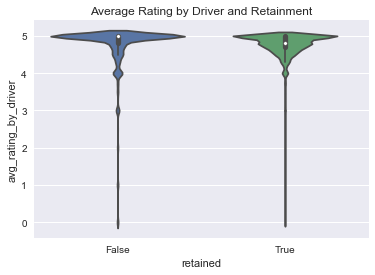

In [75]:
sns.violinplot(x='retained', y='avg_rating_by_driver', data=riders)
plt.title('Average Rating by Driver and Retainment')

(array([  9033.,    756.,   1904.,   1853.,   2389.,   5368.,   3925.,
          4810.,   4758.,  15204.]),
 array([     0. ,   1562.5,   3125. ,   4687.5,   6250. ,   7812.5,
          9375. ,  10937.5,  12500. ,  14062.5,  15625. ]),
 <a list of 10 Patch objects>)

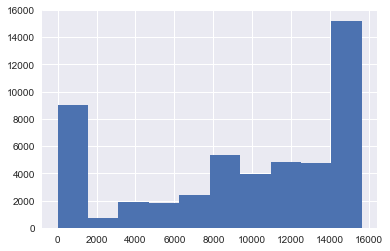

In [14]:
riders['rating_of_by_driver'] = (riders.avg_rating_of_driver * riders.avg_rating_by_driver) ** 3
plt.hist(riders[riders.rating_of_by_driver.isnull() == 0].rating_of_by_driver)

In [ ]:
riders.avg_rating_by_driver.min()

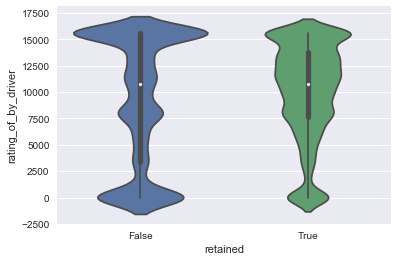

In [15]:
sns.violinplot(x='retained', y='rating_of_by_driver', data=riders)

(array([  6.21000000e+02,   5.77200000e+03,   1.66270000e+04,
          1.37940000e+04,   7.17500000e+03,   4.66700000e+03,
          1.11400000e+03,   2.11000000e+02,   1.70000000e+01,
          2.00000000e+00]),
 array([ 0.        ,  0.50873494,  1.01746988,  1.52620482,  2.03493976,
         2.5436747 ,  3.05240963,  3.56114457,  4.06987951,  4.57861445,
         5.08734939]),
 <a list of 10 Patch objects>)

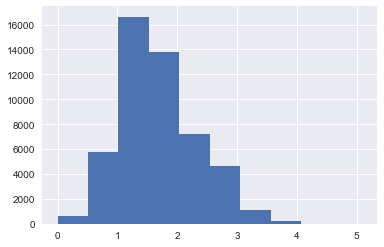

In [6]:
#plt.hist(riders.avg_dist)
riders['avg_dist_log'] = np.log((1+ riders.avg_dist))
plt.hist(riders.avg_dist_log)

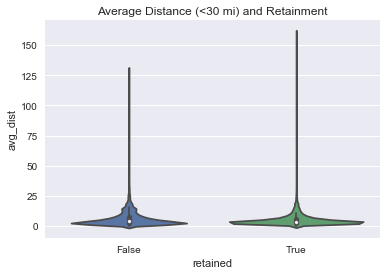

In [7]:
#riders_under50 = riders[riders.avg_dist < 30]
sns.violinplot(x='retained', y='avg_dist', data=riders)
plt.title('Average Distance (<30 mi) and Retainment')

In [ ]:
sns.violinplot(x='retained', y='weekday_pct', data=riders)

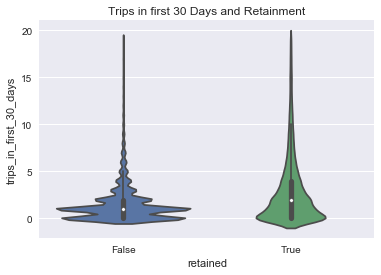

In [12]:
riders_30_days = riders[riders.trips_in_first_30_days < 20]

sns.violinplot(x='retained', y='trips_in_first_30_days', data=riders_30_days)
plt.title('Trips in first 30 Days and Retainment')

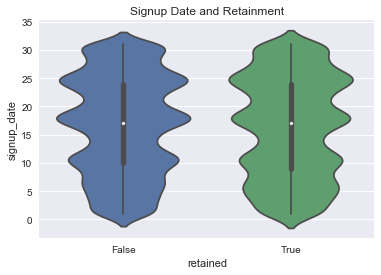

In [77]:
sns.violinplot(x='retained', y='signup_date', data=riders)
plt.title('Signup Date and Retainment')

In [25]:
riders.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,rating_of_by_driver
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,25,15.4,4,True,46.2,True,12977.875000
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,29,0.0,0,False,50.0,False,15625.000000
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,6,0.0,3,False,100.0,False,9938.375000
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,10,20.0,9,True,80.0,True,11451.483064
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,27,11.8,14,False,82.4,False,10021.812416


In [22]:
y = riders.retained
#X = riders.drop(['retained', 'last_trip_date', 'avg_rating_by_driver', 'avg_rating_of_driver'], 1)
X = riders.drop(['retained', 'last_trip_date', 'avg_dist'], 1)

In [23]:
#riders.rating_of_by_driver.replace('NaN', 0, inplace=True)
X = X.drop('phone', 1)
X_phone = pd.get_dummies(riders.phone, drop_first=False)
X = pd.get_dummies(X, drop_first=True)
X['android'] = X_phone.Android
X['iphone'] = X_phone.iPhone
X.avg_rating_by_driver = X.avg_rating_by_driver ** 3
X.avg_rating_by_driver.fillna(X.avg_rating_by_driver.mean(), inplace=True)
X.avg_rating_of_driver.fillna(X.avg_rating_of_driver.mean(), inplace=True)
#X = X.drop(['retained', 'last_trip_date', 'avg_rating_by_driver', 'avg_rating_of_driver', 'rating_of_driver_cubed'], 1)
X.head()

,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,avg_dist_log,city_King's Landing,city_Winterfell,android,iphone
0,125.000,4.7,1.10,25,15.4,4,True,46.2,1.541159,1,0,0,1
1,125.000,5.0,1.00,29,0.0,0,False,50.0,2.225704,0,0,1,0
2,125.000,4.3,1.00,6,0.0,3,False,100.0,0.570980,0,0,0,1
3,117.649,4.6,1.14,10,20.0,9,True,80.0,1.211941,1,0,0,1
4,117.649,4.4,1.19,27,11.8,14,False,82.4,1.418277,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.003, 0.1, 0.03, 1, 3, 10, 30, 100]

param_grid = {'C':Cs}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

logreg_cv.fit(X.values, y.values)

print(logreg_cv.best_params_) 
print(logreg_cv.best_score_)

In [ ]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values, test_size=.3, random_state=42)

clf = LogisticRegression(C=0.03)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

ylf_pred=clf.predict(Xtestlr)
# Print the accuracy from the testing data.
print(accuracy_score(ylf_pred, ytestlr))
confusion_matrix(ytestlr, ylf_pred)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xrf, Xtestrf, yrf, ytestrf = train_test_split(X.values, y.values, test_size=.3, random_state=42)
estimators = range(10, 300, 10)
accuracy = []
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(Xrf, yrf)
    accuracy.append(accuracy_score(rf.predict(Xtestrf), ytestrf))
    #print(accuracy_score(rf.predict(Xtestrf), ytestrf))
    #print(rf.feature_importances_) 

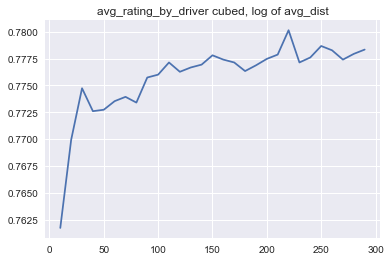

In [25]:
plt.plot(estimators, accuracy)
plt.title('avg_rating_by_driver cubed, log of avg_dist')

In [26]:
from sklearn.metrics import confusion_matrix
Xrf, Xtestrf, yrf, ytestrf = train_test_split(X.values, y.values, test_size=.3, random_state=42)

rf = RandomForestClassifier(n_estimators = 150)
rf.fit(Xrf, yrf)
y_pred = rf.predict(Xtestrf)
print(X.columns)
print(accuracy_score(y_pred, ytestrf))
print(rf.feature_importances_) 
confusion_matrix(ytestrf, y_pred)

Index(['avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'avg_dist_log',
       'city_King's Landing', 'city_Winterfell', 'android', 'iphone'],
      dtype='object')
0.775733333333
[ 0.10734457  0.07223835  0.0611906   0.13241489  0.07859846  0.07394787
  0.03197689  0.11855109  0.20337448  0.06259794  0.01577788  0.02232064
  0.01966635]


array([[8081, 1442],
       [1922, 3555]])

In [ ]:
#true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}

In [61]:
X.head()# .772

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_King's Landing,city_Winterfell,android,iphone
0,3.67,5.0,4.7,1.10,25,15.4,4,True,46.2,1,0,0,1
1,8.26,5.0,5.0,1.00,29,0.0,0,False,50.0,0,0,1,0
2,0.77,5.0,4.3,1.00,6,0.0,3,False,100.0,0,0,0,1
3,2.36,4.9,4.6,1.14,10,20.0,9,True,80.0,1,0,0,1
4,3.13,4.9,4.4,1.19,27,11.8,14,False,82.4,0,1,1,0
